In [118]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import statsmodels.formula.api as smf 
import statsmodels.api as sm
import os

In [119]:
os.getcwd()

'/Users/Rong/Desktop'

In [120]:
testSet = pd.read_csv("testSet.txt", sep= "\\s+", header = None)
##dataPlot = sns.lmplot('x', 'y', 'type', data=testData, ci =None)
testSet.head()




,0,1,2
0,-0.017612,14.053064,0
1,-1.395634,4.662541,1
2,-0.752157,6.538620,0
3,-1.322371,7.152853,0
4,0.423363,11.054677,0


In [122]:
import numpy as np


class logistic_regression(classifier):

    def __init__(self, cycles):
        self.alpha = 0.001
        self.maxcycles = cycles
        self.weights = None  # Placeholder for later...


    def sigmoid(self, x):
        return 1.0 / (1 + np.exp(-x))


    def fit(self, Xin, Yin):
        print('Logistic Regression classifier - fit')

        X = np.mat(Xin)
        Y = np.mat(Yin).transpose()
        m, n = X.shape
        self.weights = np.ones((n, 1))
        for k in range(self.maxcycles):
            h = self.sigmoid(X * self.weights)
            error = (Y - h)
            self.weights = self.weights + self.alpha * X.transpose() * error
        return self.weights
 

    def predict(self, X):
        hypotheses = []
        for x in X:
            prob = self.sigmoid(sum(x*self.weights))
            if prob > 0.5:
                hypotheses.append(1)
            else:
                hypotheses.append(0)
        return hypotheses

Logistic Regression classifier - fit
Weights: [[ 9.35184677]
 [ 0.87401362]
 [-1.28891422]]


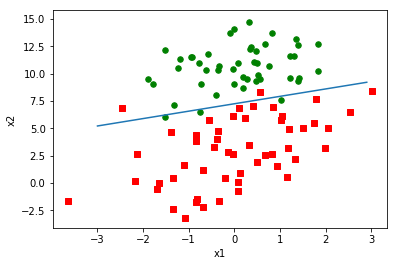

Accuracy: 0.92
-----------------------------
	Confusion Matrix
-----------------------------
		Predicted
	Actual	NO	YES
-----------------------------
	NO	 10.0 	 1.0
-----------------------------
	YES	 1.0 	 13.0
-----------------------------


In [123]:


def get_data(filename):
    datamatrix = []
    labelmatrix = []
    fr = open(filename)
    for line in fr.readlines():
        lineArr = line.strip().split()
        datamatrix.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelmatrix.append(int(lineArr[2]))
    return datamatrix, labelmatrix


def plot_fit(fit_line, datamatrix, labelmatrix):
    import matplotlib.pyplot as plt
    import numpy as np

    weights = fit_line.getA()

    dataarray = np.asarray(datamatrix)
    n = dataarray.shape[0]

    # Keep track of the two classes in different arrays so they can be plotted later...
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(labelmatrix[i]) == 1:
            xcord1.append(dataarray[i, 1])
            ycord1.append(dataarray[i, 2])
        else:
            xcord2.append(dataarray[i, 1])
            ycord2.append(dataarray[i, 2])
    fig = plt.figure()

    # Plot the data as points with different colours
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')

    # Plot the best-fit line
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]
    ax.plot(x, y)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()


def accuracy(labels, hypotheses):
    count = 0.0
    correct = 0.0

    for l, h in zip(labels, hypotheses):
        count += 1.0
        if l == h:
            correct += 1.0
    return correct / count


def print_confusion_matrix(labels, hypotheses):
    tp = 0.0
    tn = 0.0
    fp = 0.0
    fn = 0.0
    count = 1.0
    for l, h in zip(labels, hypotheses):
        count += 1.0
        if l == 1 and h == 1:
            tp += 1.0
        elif l == 1 and h == 0:
            fn += 1.0
        elif l == 0 and h == 0:
            tn += 1.0
        else:
            fp += 1
    print('-----------------------------')
    print('\tConfusion Matrix')
    print('-----------------------------')
    print('\t\tPredicted')
    print('\tActual\tNO\tYES')
    print('-----------------------------')
    print('\tNO\t', tn, '\t', fp)
    print('-----------------------------')
    print('\tYES\t', fn, '\t', tp)
    print('-----------------------------')

    
X, Y = get_data('testSet.txt')

clf = logistic_regression(5000)
w = clf.fit(X, Y)
print('Weights:', w)
plot_fit(w, X, Y)

verify_x, verify_y = get_data('verify.txt')
hypotheses = clf.predict(verify_x)

print('Accuracy:', accuracy(verify_y, hypotheses))

print_confusion_matrix(verify_y, hypotheses)

In [2]:
def get_data_and_labels(filename):
    import pandas as pd
    
    df = pd.read_csv(filename, header = None, sep='\t')
    x = df.iloc[:,1]
    y = df.iloc[:,0]
    return x, y

In [7]:
train_x, train_y = get_data_and_labels('/Users/Rong/Desktop/general-tweets.txt')
test_x, test_y = get_data_and_labels('/Users/Rong/Desktop/keyword-tweets.txt')

test_x.head()
test_y.head()


0    POLIT
1    POLIT
2      NOT
3    POLIT
4    POLIT
Name: 0, dtype: object

In [150]:
def encode_labels(labels):
    
    from sklearn import preprocessing 
    
    le = preprocessing.LabelEncoder()
    le.fit(labels)
    return le
    

In [178]:
le = encode_labels(train_y)
train_targets = le.transform(train_y)
test_targets = le.transform(test_y)

train_targets

array([0, 0, 0, ..., 0, 0, 1])

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer()
x_train_counts = count_vector.fit_transform(train_x).toarray()
x_test_counts = count_vector.transform(test_x).toarray()

print(x_train_counts.shape)
print(x_test_counts.shape)
#we have 2000 instances and 9048 features 
# In this way we lose so much degrees of freedom n-p
##### stock words are useless so we want to get rid of them as features 
### words that occur too seldom are not sufficient to warrant predictive power 
### so we get rid of them too 
# lasso regression, if we see instances of two variables occur together too often then we only take one into account?


(2000, 9048)
(2004, 9048)


In [169]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix

classifier = LogisticRegression()
classifier.fit(x_train_counts, train_targets)
hyp = classifier.predict(x_test_counts)

print('Accuracy: ', accuracy_score(test_targets, hyp))
print('Confusion Matrix: ', confusion_matrix(test_targets, hyp))


Accuracy:  0.15618762475
Confusion Matrix:  [[ 313    0]
 [1691    0]]


In [175]:
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

for c in C: 
    classifier = LogisticRegression(penalty ='l1', C=c)
    classifier.fit(x_train_counts, train_targets)
    hyp = classifier.predict(x_test_counts)
    accuracy = accuracy_score(test_targets, hyp)
    print('C = ', c, '... accuracy: ', accuracy)
    

C =  0.0001 ... accuracy:  0.15618762475
C =  0.001 ... accuracy:  0.15618762475
C =  0.01 ... accuracy:  0.15618762475
C =  0.1 ... accuracy:  0.15618762475
C =  1 ... accuracy:  0.199600798403
C =  10 ... accuracy:  0.268962075848
C =  100 ... accuracy:  0.288922155689
C =  1000 ... accuracy:  0.292415169661
C =  10000 ... accuracy:  0.273952095808


In [174]:
classifier.fit(x_train_counts, train_targets)
hyp = classifier.predict(x_test_counts)
print('Confusion Matrix: ', confusion_matrix(test_targets, hyp))

Confusion Matrix:  [[ 301   12]
 [1601   90]]
